# SEP532 - 인공지능 이론과 실제 (2022 Spring)
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

# 4. Feedforward Neural Network

## Implement simple network using TensorFlow 

### Computation graph
The neural network is based on the **computation graph**.

Computation graph is composed of the series of operations between tensors. Each operation defines a node in the computaiton graph. Below figure shows an exmaple of computation graph.

<img src="https://github.com/keai-kaist/SEP532/blob/master/Week1/imgs/computation_graph_ex.png?raw=true" align="center" width="500" />


This graph is a forward function that takes `p`, `q`, and `s` as input variables and computes the output variable `t`. 
```
r = p + q
t = r * s = (p + q) * s
```
  
If we assign 3, 5, 2 to `p`, `q`, and `s`, respectively, then we can get `t` that is equal to 16
```
p = 3  
q = 5  
s = 2  
r = p + q = 8  
t = r * s = (p + q) * s = 8 * 2 = 16
```

This simple process can be easily described using **tensorflow**, as follows.

In [1]:
import tensorflow as tf

p = tf.constant(3)
q = tf.constant(5)
s = tf.constant(2)
r = tf.add(p, q)
t = tf.multiply(r, s) 

print('r :', r)
print('t :', t)

r : tf.Tensor(8, shape=(), dtype=int32)
t : tf.Tensor(16, shape=(), dtype=int32)


### Simple network 

Below figure shows very simple nerual network based on computation graph. 

<img src="https://i.imgur.com/NxfQgpy.png" width="600">

In this network, the `x` is a input data, `W` and `b` are weights. To obtain the output, the network conducts perceptron with `x`, `W`, and `b` through the activatin fcuctnion. Using the TensorFlow, we can implement the perceptron process. 

#### Create a variable for weights

For the weights, `W` and `b`, we should create a tensor variable with initial values. To do this, we can use `tf.Variable`.

In [2]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [3]:
# n_in: number of inputs 
# n_out: number of outputs 
# suppose that n_in is (1x2), n_out is (1x3)
def simple_dense_layer(x, n_in, n_out): 
    W = tf.Variable(tf.random.uniform((n_in, n_out))) 
    b = tf.Variable(tf.random.uniform((1, n_out))) 
    
    z = tf.matmul(x, W) + b

    out = tf.sigmoid(z)
    
    return out

Then, we can define an example input, feed it into `simple_dense_layer` function, and immediately execute:

In [7]:
# define an example input (x_input)
x_input = tf.constant([[1.0, 2.0]])

# TODO: call `our_dense_layer` to get the output of the network
print(simple_dense_layer(x_input, n_in=2, n_out=3))

tf.Tensor([[0.8913213  0.9294633  0.97149277]], shape=(1, 3), dtype=float32)


### Tnesorflow with Keras

Now, instead of explicitly defining a simple function, we'll use the **Keras API**. The Keras is included in the TensorFlow and it provides high-level APIs through the `tf.keras.Sequential` to build more complicated neural network easily as well as low-level APIs to allow the user to custom network structure. 

First of all, we'll look at the `tf.keras.Sequential`by implementing above simple network . 

In [9]:
# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define a sequential model using Keras API
model = tf.keras.Sequential()

# Define a dense (fully connected) layer to compute z using Keras API 
dense_layer = tf.keras.layers.Dense(n_output_nodes, input_shape=(n_input_nodes,), activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)


model = tf.keras.Sequential(
    tf.keras.layers.Dense(n_output_nodes, input_shape=(n_input_nodes,), activation='sigmoid')
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## FNN-based image classification

Now, let's build a Feedforward neural network(FNN) for image classification. The FNN is an one of the basic deep nerual networks. The dataset for classification is a MNIST dataset, well known as handwritten digits. To classify the MNIST image, we build the FNN using the Keras API and train it. Then, test the trained model with test dataset. 


### MNIST dataset

The [MNIST dataset](http://yann.lecun.com/exdb/mnist) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset consists of 60,000 training images and 10,000 test images. The target classes for this dataset are the digits (0-9). 

Let's download and load the dataset and display a few random samples from it:

In [13]:
import numpy as np

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.expand_dims(train_images, axis=-1) / 255
train_labels = np.int64(train_labels)

test_images = np.expand_dims(test_images, axis=-1) / 255
test_labels = np.int64(test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']

print('shape of train_images: ', train_images.shape)
print('shape of test_images: ', test_images.shape)

shape of train_images:  (60000, 28, 28, 1)
shape of test_images:  (10000, 28, 28, 1)


Each image in the MNIST is made up of 28x28 grayscale of handwritten digits. Let's visualize what some of these images and their corresponding training labels look like.

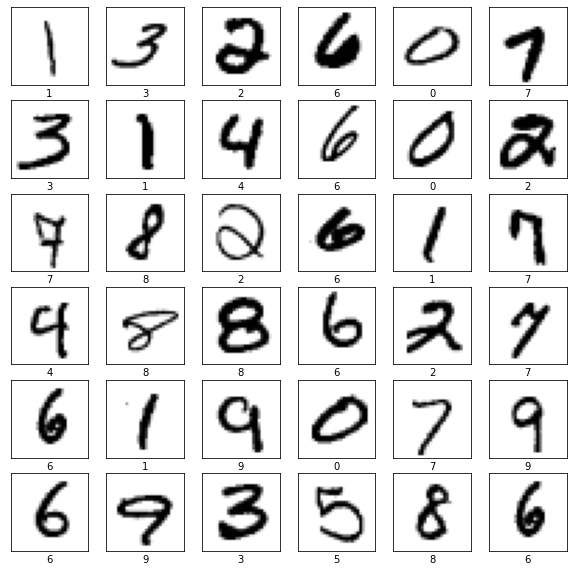

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
random_indicies = np.random.choice(60000, 36)

for index in range(36):
    plt.subplot(6, 6, index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random_indicies[index]
    plt.imshow(np.squeeze(train_images[image_index]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_index])

### Build classification model 

To build the FNN for MNIST classification, we use the Keras APIs such as `tf.keras.Sequential` and `tf.keras.Layers`. The structure of the classification model is as follows:

<img src="https://github.com/keai-kaist/SEP532/blob/master/Week1/imgs/fnn_mnist.png?raw=true" align="center" width="700"/>

In [16]:
# Define a sequential model
model = tf.keras.Sequential([
    # Add a flatten layer
    tf.keras.layers.Flatten(input_shape=train_images.shape[1:]),
    
    # Add the first dense layer with 128 nodes applying ReLU activation function
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Add the last dense layer with 10 (the number of digits) nodes applying Softmax activation function
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<img src="https://github.com/keai-kaist/SEP532/blob/master/Week1/imgs/flatten.png?raw=true" align="center" width="600"/>

**Flaaten layer** transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 784(28 * 28). This layer is for only reformatting the shape of the data so that the model can use it, therefore, it has no learned parameters. 

after the flatten layer, the network consists of a **sequence of dense layers**. First dense layer is a hidden layer with non-linear function (ReLU activation). Second is as an output layer, the dimension of the layer is same to the number of classes of MNIST. And output layer use the **softmax function** for classification. 

Softmax function, $ f_j(z) = \frac{e^{z_j}}{\sum_{K} e^{z_k}}$, takes a vector of arbitrary real-valued scores and squashes it to **a vector of values between zero and one** that sum to one. This vector represents a probability distribution over predicted output classes given the input value.


### Complie the model 

In this step, we define loss fuction and optimizer for training the model. In the Keras API, we simply achieve that by using the `tf.keras.Model.complie` function. The arguments of the compile function is as follows:

- *Loss function*: This defines how we measure how accurate the model is. During training, we want to minimize this function, which will "steer" the model in the right direction.
- *Optimizer*: This defines how the model is updated based on the data it sees and its loss function.
- *Metrics*: Here we can define metrics used to monitor the training and testing steps.

In [17]:
# Optimizer: adam optimizer
# Loss: sparse_categorical_crossentropy 
# Metrics: accuracy
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model 

Now, we're ready to train the model. To train the model, we feed the training data, `(train_images, train_labels)`, to the model in units of `batch`. In the case of the complex computations involved in the training step such as forward propagation and backward propagation, we easily implement just using the `fit` function provided in Keras API.

In [18]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 10

In [19]:
# train the model using (train_images, train_labels). 
network_history = model.fit(train_images, 
                            train_labels, 
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2953 - accuracy: 0.9167
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1355 - accuracy: 0.9608
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0961 - accuracy: 0.9714
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0726 - accuracy: 0.9782
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0574 - accuracy: 0.9833
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9863
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0375 - accuracy: 0.9891
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0312 - accuracy: 0.9912
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0259 - accuracy: 0.9921
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0205 - accuracy: 0.9947

### Plotting network performance trend

The return value of the `fit` function is a `tf.keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

In [20]:
history_dict = network_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

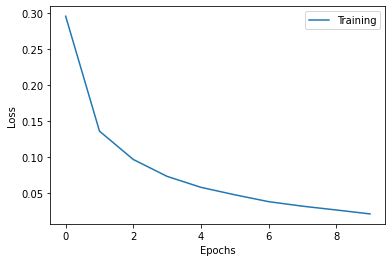

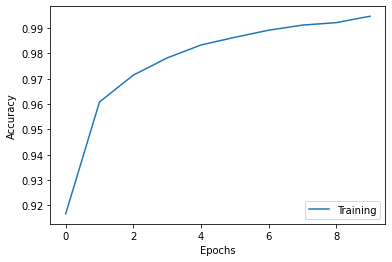

In [21]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

### Evaluate accuracy on the test dataset

Now that we've trained the model, we can ask it to make predictions about a test set that it hasn't seen before. In this example, the `test_images` array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the `test_labels` array. 

Use the `evaluate` function to evaluate the model on the test dataset!

In [22]:
# Evaluate the model using (test_images, test_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

313/313 - 0s - loss: 0.0753 - accuracy: 0.9782 - 319ms/epoch - 1ms/step
Test accuracy: 0.9782000184059143


#### Make prediction

With the model trained, we can use it to make predictions about some images thought the `prediction` function.

In [24]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

[1.6756213e-07 1.7140632e-10 4.5748629e-07 1.4887973e-05 7.5308921e-13
 3.5356684e-09 2.6839919e-14 9.9998093e-01 8.6407560e-08 3.4612949e-06]


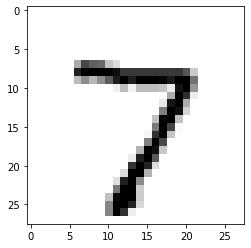

In [25]:
print(predictions[0])
plt.imshow(np.squeeze(test_images[0]), cmap=plt.cm.binary)

In [26]:
print('Predicted digit for test image[0]: {}'.format(np.argmax(predictions[0])))

print('Ground truth of test image[0]: {}'.format(test_labels[0]))

Predicted digit for test image[0]: 7
Ground truth of test image[0]: 7


In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

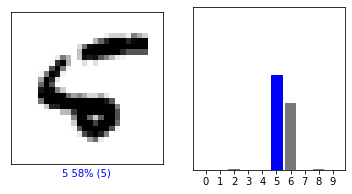

In [28]:
i = 8 
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

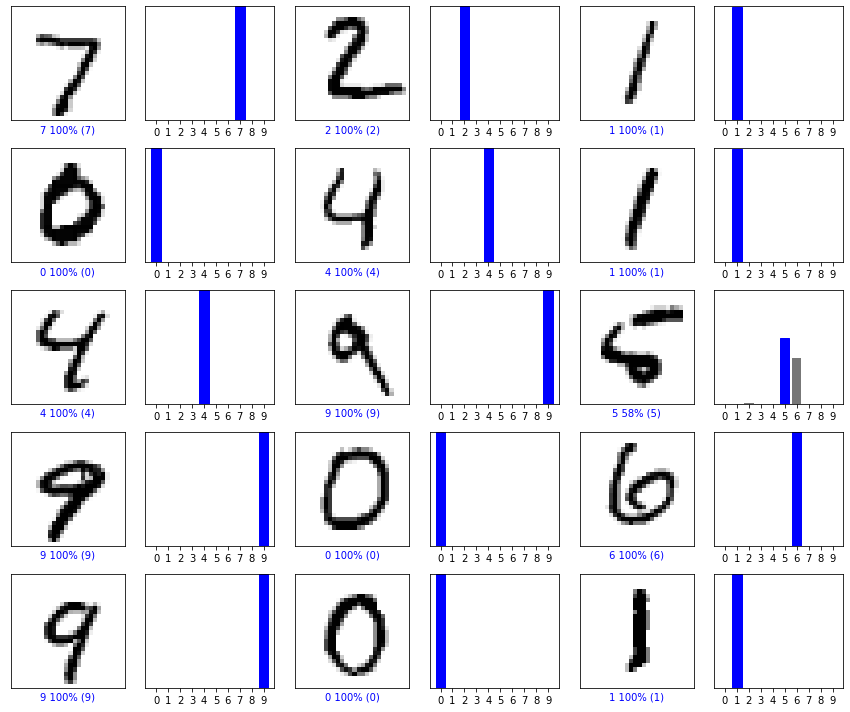

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()